In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Dataset .csv")
pd.set_option('display.max_columns',21)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Task1: Restaurant Reviews
1. Analyze the text reviews to identify the most common positive and negative keywords.
2. Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.columns

Index(['restaurant id', 'restaurant name', 'country code', 'city', 'address',
       'locality', 'locality verbose', 'longitude', 'latitude', 'cuisines',
       'average cost for two', 'currency', 'has table booking',
       'has online delivery', 'is delivering now', 'switch to order menu',
       'price range', 'aggregate rating', 'rating color', 'rating text',
       'votes'],
      dtype='object')

In [5]:
df['rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [6]:
rating_text = df.groupby('rating text',as_index=False).size().rename(columns={'size':'count'}).sort_values('count',ascending=False)
rating_text

,rating text,count
0,Average,3737
3,Not rated,2148
2,Good,2100
5,Very Good,1079
1,Excellent,301
4,Poor,186


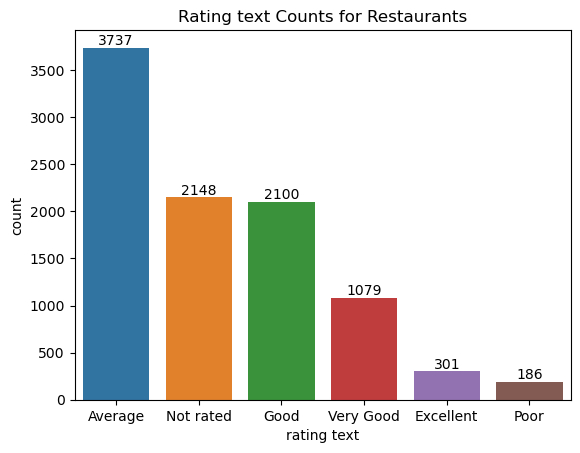

In [7]:
x= sns.barplot(x='rating text',y='count',data=rating_text)
for bar in x.containers:
    x.bar_label(bar)
plt.title("Rating text Counts for Restaurants")
plt.show()

#### By this visualization it can be concluded that the most common "positive" rating given to restaurants is "good" and the most common "negative" rating is "poor" which is given to very few of the restaurants. Also the most common rating given is "Average". 

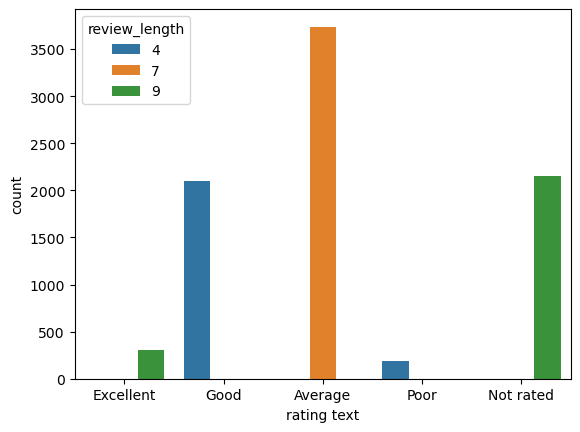

In [8]:
review_df = df.groupby('rating text',as_index=False).agg({'aggregate rating':'mean'}).sort_values('aggregate rating',ascending=False)
review_df['rating text'] = review_df['rating text'].replace('Very Good','VeryGood')
review_df['review_length'] = review_df['rating text'].apply(len)
review_df = review_df.merge(rating_text)
sns.barplot(x= 'rating text',y='count',hue='review_length',data=review_df)
plt.show()

### From this visualization we can see that there is no specific relationship between review text and review length

## Task2: Votes Analysis
1. Identify the restaurants with the highest and lowest number of votes.
2. Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [9]:
lowest_rating_restaurants  =  df[df['votes']==0]
lowest_rating_restaurants.groupby(['restaurant name','votes','city','address'],as_index=False).agg({'aggregate rating':'mean'})

,restaurant name,votes,city,address,aggregate rating
0,#hashtag,0,New Delhi,"1092/1, Mehrauli Bus Stand, Mehrauli, New Delhi",0.0
1,13 Cafe,0,New Delhi,"4/175, Subhash Nagar, New Delhi",0.0
2,"34, Chowringhee Lane",0,New Delhi,"Shop 68, Vasant Place Market, Sector 6, R K Pu...",0.0
3,3x Cafe,0,New Delhi,"22, RU Block, Opposite Power House, Pitampura,...",0.0
4,44 Grills,0,Noida,"Street 3, Sector 44, Noida",0.0
...,...,...,...,...,...
1089,Zaika Muradabadi,0,New Delhi,"Shop 27/6, Garhi Main Market, East of Kailash,...",0.0
1090,Zaika Restaurant,0,New Delhi,"B-83, Ganesh Nagar Complex, Pandav Nagar, New ...",0.0
1091,Zaika-E-Chaap Express,0,New Delhi,"Near Police Chowki, Golchakkar, R Block, Dilsh...",0.0
1092,Zayka chicken restaurant,0,New Delhi,"C 31, Acharya niketan, Mayur Vihar Phase 1, Ne...",0.0


## From this dataset we can conclude that more than 1000 restaurants are voted 0

In [10]:
highest_rating_restaurants = df.groupby(['restaurant name','votes','city','address'],as_index=False).agg({'aggregate rating':'mean'}).sort_values('votes',ascending=False)
highest_rating_restaurants.head(10)

,restaurant name,votes,city,address,aggregate rating
8932,Toit,10934,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",4.8
8987,Truffles,9667,Bangalore,"28, 4th 'B' Cross, Koramangala 5th Block, Bang...",4.7
3883,Hauz Khas Social,7931,New Delhi,"9-A & 12, Hauz Khas Village, New Delhi",4.3
6356,Peter Cat,7574,Kolkata,"18A, Park Street, Park Street Area, Kolkata",4.3
122,AB's - Absolute Barbecues,6907,Bangalore,"90/4, 3rd Floor, Outer Ring Road, Munnekollaly...",4.6
818,Barbeque Nation,5966,Kolkata,"K1, RDB Boulevard, Block EP & GP, Sector 5, Sa...",4.9
1022,Big Brewsky,5705,Bangalore,"Behind MK Retail, Before WIPRO Corporate Offic...",4.5
121,AB's - Absolute Barbecues,5434,Hyderabad,"Plot 483, 4th Floor, Pemmasani Complex, Bajaj ...",4.9
8365,The Black Pearl,5385,Bangalore,"105, 1st A Cross Road, Jyothi Nivas College Ro...",4.1
787,BarBQ,5288,Kolkata,"43-47-55, Park Street Area, Kolkata",4.2


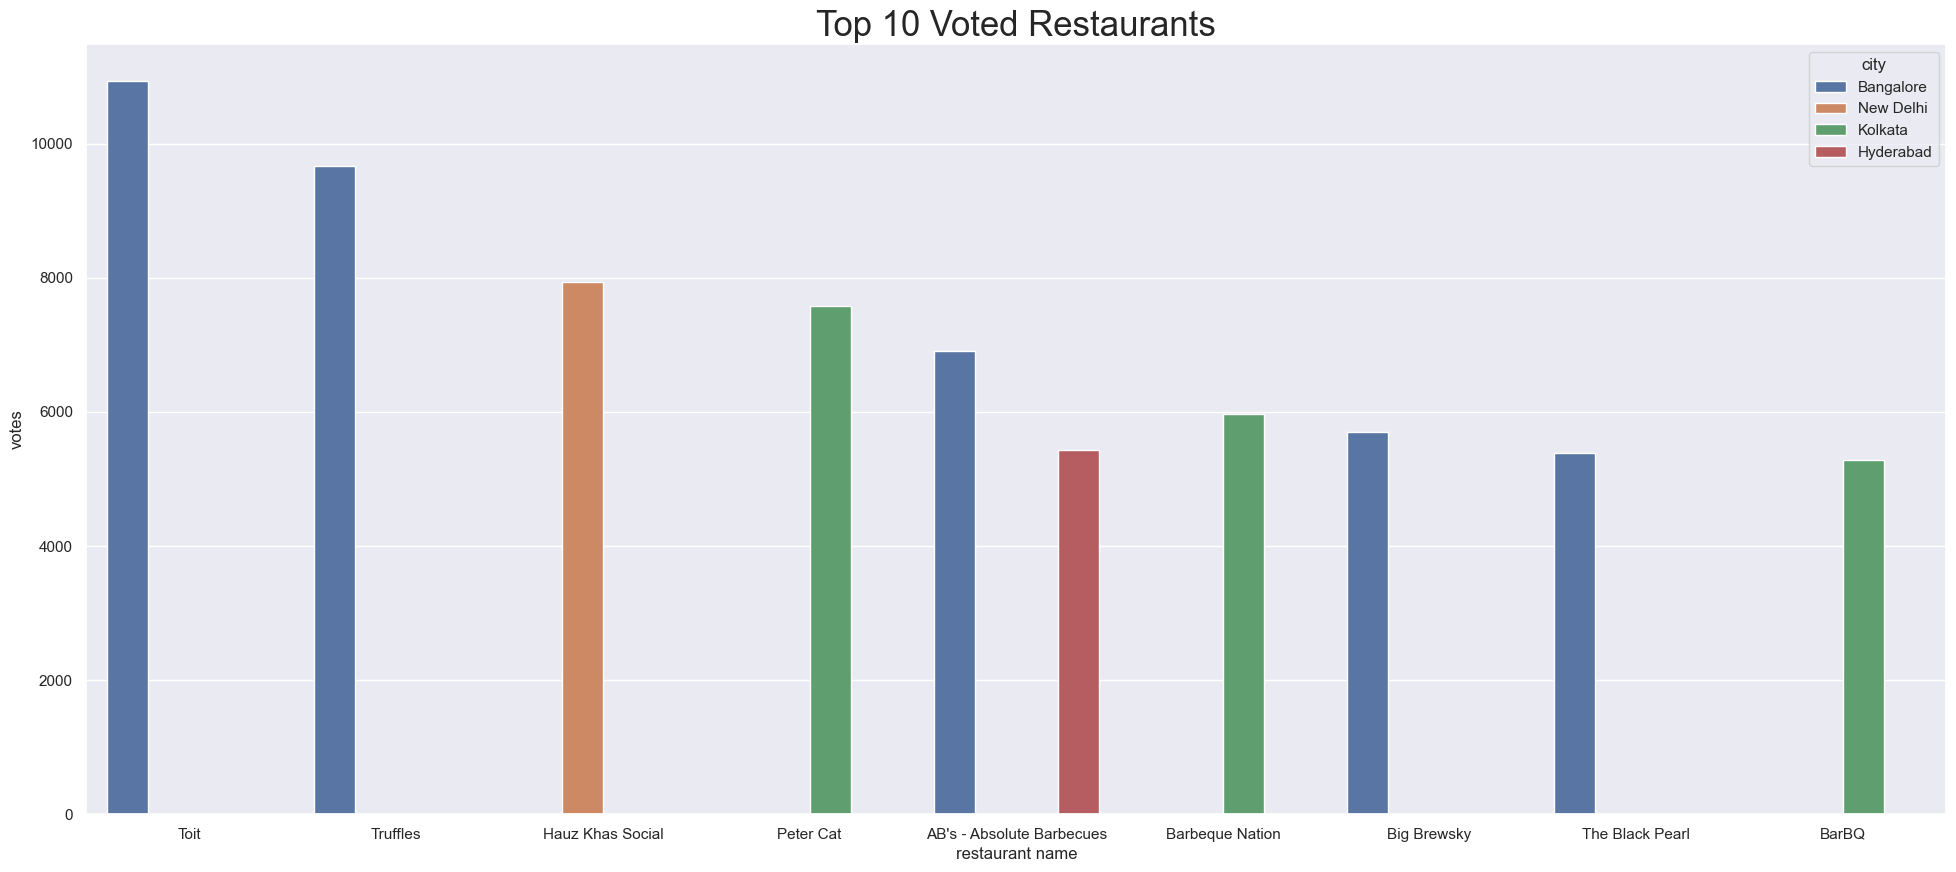

In [11]:
sns.set(rc={'figure.figsize':(24,10)})
sns.barplot(x='restaurant name',y='votes',hue='city',data=highest_rating_restaurants.head(10))
plt.title("Top 10 Voted Restaurants",fontsize=25)
plt.show()

In [12]:
# 2. Analyze if there is a correlation between the number of votes and the rating of a restaurant.

df3 = df.groupby('votes',as_index=False).agg({"aggregate rating":'mean'})
cor = df3.corr()
cor

,votes,aggregate rating
votes,1.000000,0.376689
aggregate rating,0.376689,1.000000


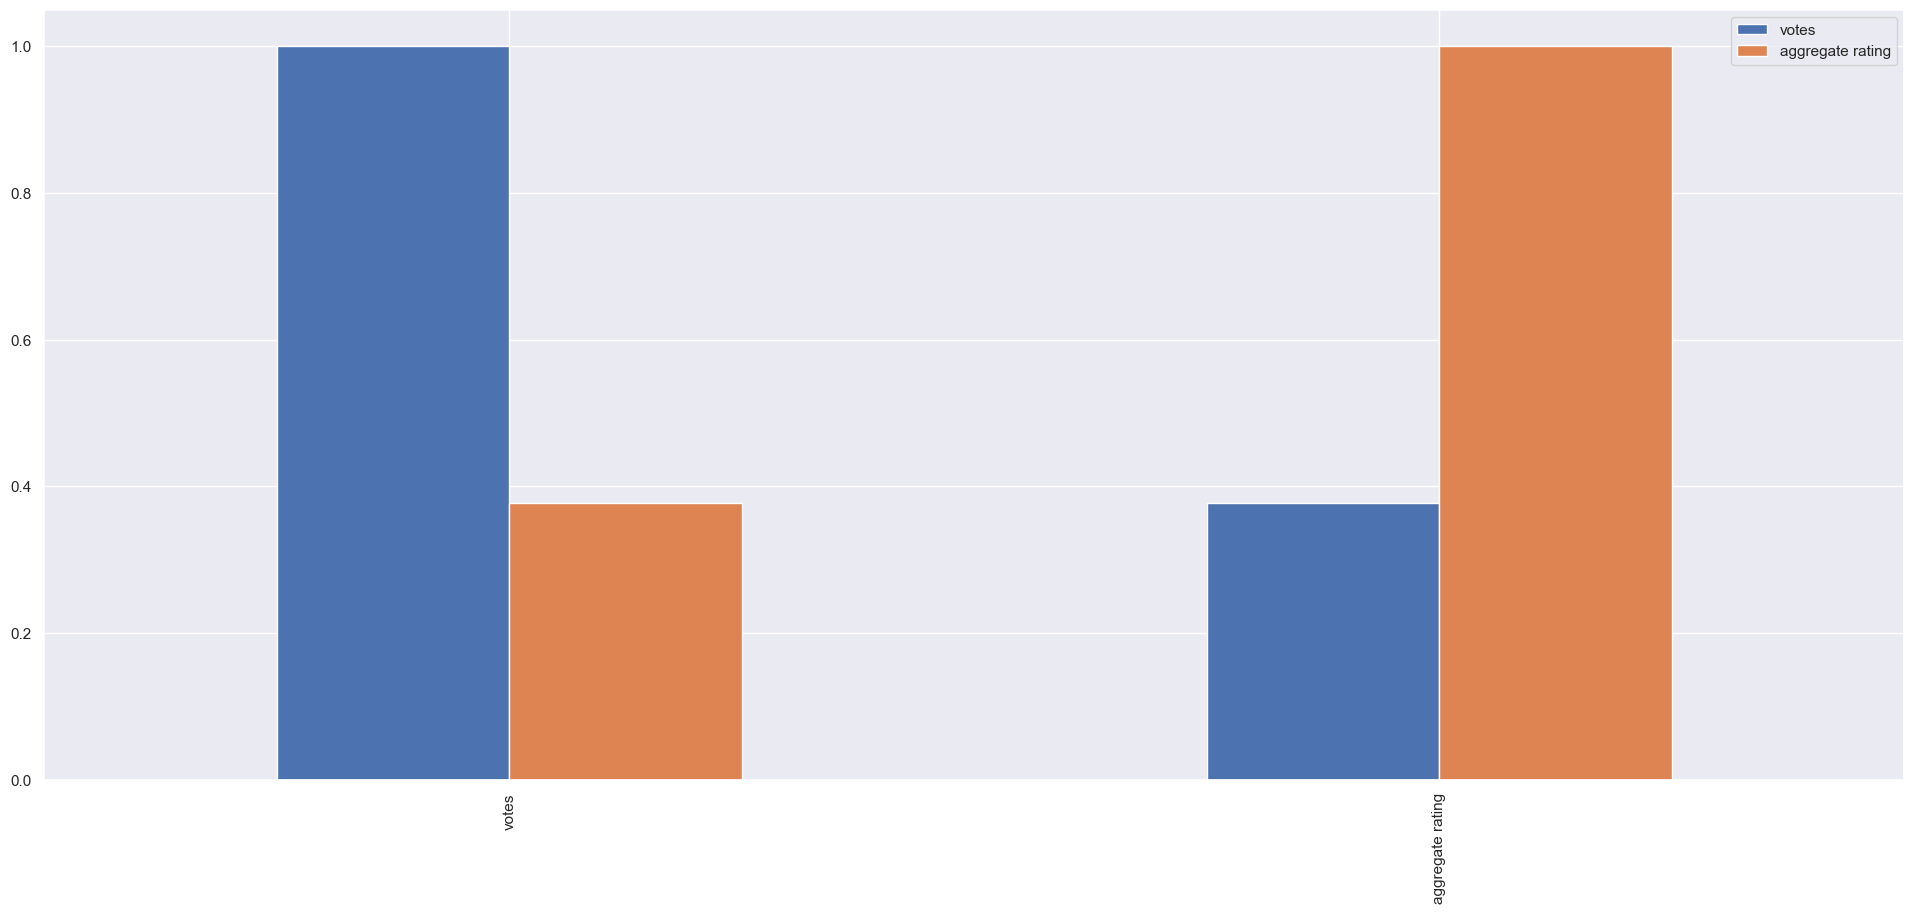

In [13]:
cor.plot(kind = 'bar')
plt.show()

### So the correlation between votes and aggregate ratings is 0.37 which is low, so we can say that both fields are not really related with each other, which means number of votes do not have a significant effect on  the aggregate rating of restaurant  and vice versa.

## Task3: Price Range vs. Online Delivery and Table Booking
1. Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
2. Determine if higher-priced restaurants are more likely to offer these services.


In [14]:
df.columns

Index(['restaurant id', 'restaurant name', 'country code', 'city', 'address',
       'locality', 'locality verbose', 'longitude', 'latitude', 'cuisines',
       'average cost for two', 'currency', 'has table booking',
       'has online delivery', 'is delivering now', 'switch to order menu',
       'price range', 'aggregate rating', 'rating color', 'rating text',
       'votes'],
      dtype='object')

In [15]:
with_table_booking = df[df['has table booking']=='Yes'].groupby('price range',as_index=False).size().rename(columns={'size':'restaurant_with_table_booking'})
cor = with_table_booking.corr()
cor

,price range,restaurant_with_table_booking
price range,1.000000,0.594858
restaurant_with_table_booking,0.594858,1.000000


###  By correlation of 0.59 price range and table booking are moderately correlated which means
--- if the restaurant has table booking facility then it's price range will be slighly high because of this facility

In [16]:
No_table_booking = df[df['has table booking']=='No'].groupby('price range',as_index=False).size().rename(columns={'size':'restaurant_with_no_table_booking'})
cor = No_table_booking.corr()
cor

,price range,restaurant_with_no_table_booking
price range,1.000000,-0.974671
restaurant_with_no_table_booking,-0.974671,1.000000


###  By correlation of negative 0.97 price range and table booking are highly correlated which means
--- if the restaurant do not have table booking facility then it's price range will be very low because of lack of this facility

In [17]:
with_online_delivery = df[df['has online delivery']=='Yes'].groupby('price range',as_index=False).size().rename(columns={'size':'restaurant_with_online_delivery'})
cor = with_online_delivery.corr()
cor

,price range,restaurant_with_online_delivery
price range,1.000000,-0.698202
restaurant_with_online_delivery,-0.698202,1.000000


In [18]:
no_online_delivery = df[df['has online delivery']=='No'].groupby('price range',as_index=False).size().rename(columns={'size':'restaurant_with_no_online_delivery'})
cor = no_online_delivery.corr()
cor

,price range,restaurant_with_no_online_delivery
price range,1.000000,-0.952993
restaurant_with_no_online_delivery,-0.952993,1.000000


### The Price range has negative correlation of 0.7 with online delivery means restaurants with online delivery offers a low price range and by the negative correlation of 0.95 we can say restaurants with no online delivery offer very cheap prices.